In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [37]:
df_Xtrain=pd.read_csv('/content/fashion-mnist_train.csv')
df_Xtest=pd.read_csv('/content/fashion-mnist_test.csv')

In [38]:
Xtrain=df_Xtrain.drop('label',axis=1)
Ytrain=df_Xtrain['label']

In [39]:
Xtest=df_Xtest.drop('label',axis=1)
Ytest=df_Xtest['label']

In [40]:
Xtrain=Xtrain.astype('float32')/255.0
Xtest=Xtest.astype('float32')/255.0

In [41]:
Xtrain1=Xtrain.values.reshape(-1,28,28,1)
Xtest1=Xtest.values.reshape(-1,28,28,1)

In [42]:
labels=['Tshirt','Trousers','Pullover','Dress','Coat','Sandals','Sneakers','Shirts','Bags','Ankle boots']

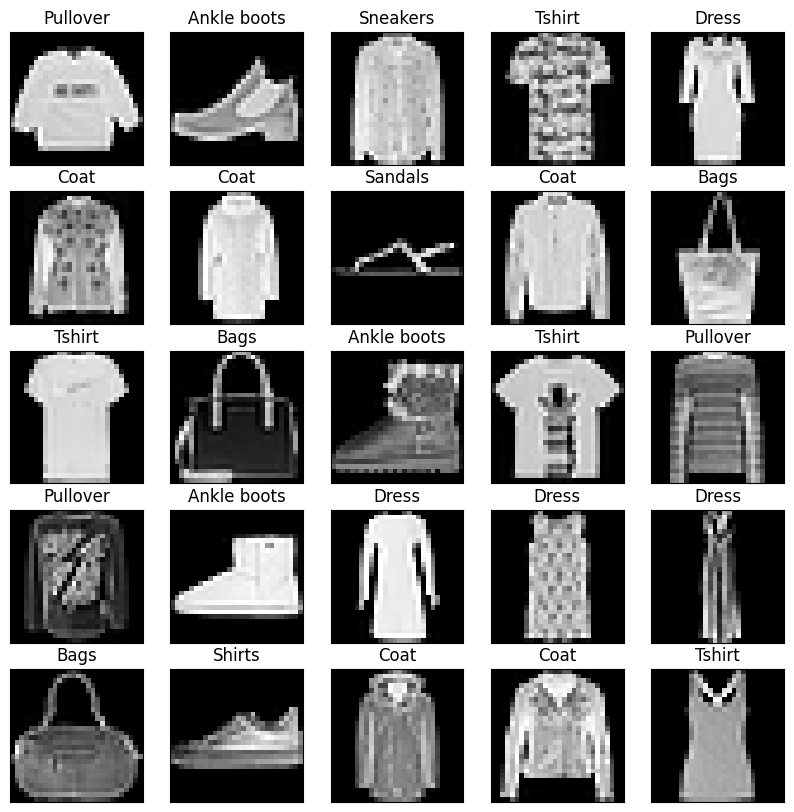

In [44]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(Xtrain1[i],cmap='gray')
  plt.title(labels[Ytrain[i]])



In [46]:
model= Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [48]:
model.fit(Xtrain1,Ytrain,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3868 - accuracy: 0.8616
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9036
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2143 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1786 - accuracy: 0.9340
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1502 - accuracy: 0.9439


In [49]:
loss,accu=model.evaluate(Xtest1,Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9233


In [50]:
predictions=model.predict(Xtest1)

313/313 [==============================] - 1s 2ms/step


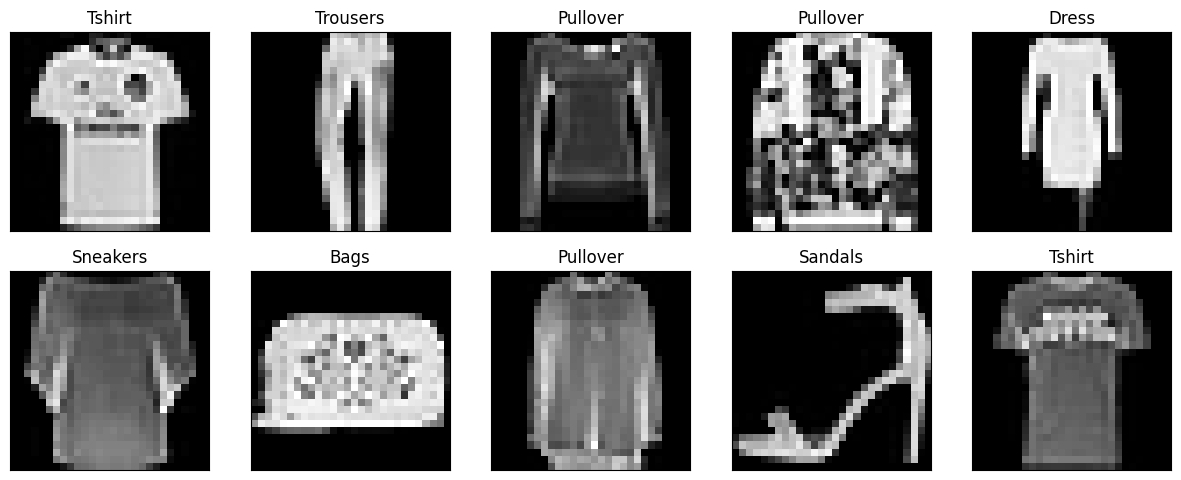

In [53]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(Xtest1[i].reshape(28,28),cmap='gray')
  plt.title(labels[np.argmax(predictions[i])])
plt.show()